# Node classification - Real world dataset

In [47]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sns
from matplotlib import axes
import os 
import pandas as pd
import json

import sys, os
sys.path.append('/cluster/home/kamara/Explain')
from clutils.nbutils import *
from clutils.nbutils.params import get_param_ranges
os.getcwd()
sns.set()

In [114]:
pal = sns.color_palette("Paired", 11)
dict_color = {"random":pal[0], "distance":pal[1], "pagerank":pal[2], "sa": pal[3], "ig": pal[4], "gradcam": pal[5], "occlusion":pal[6], 
              "basic_gnnexplainer": pal[7], "gnnexplainer": pal[8], 
              "pgmexplainer":pal[9], "subgraphx": pal[10]}


In [80]:
dir = '/cluster/home/kamara/Explain/csv/node_classification/real'

jsonpath = f'/cluster/home/kamara/Explain/configs/config_real.json'
ranges = get_param_ranges(jsonpath)

df_sparsity = pd.read_csv(os.path.join(dir, f'nc_real_sparsity_all.csv'), index_col = 0)
res = df_sparsity.groupby(by=['dataset', 'sparsity', 'explainer_name', 'true_label_as_target', 'hard_mask']).mean()
res = res.reset_index()

In [81]:
def explainer_type(row):
    if row['explainer_name'] in ['basic_gnnexplainer', 'gnnexplainer', 'pgmexplainer', 'occlusion', 'subgraphx'] :
      return('pertubation')
    elif row['explainer_name'] in ['sa', 'ig', 'gradcam'] :
      return('gradient')
    return('baseline')

df_sparsity['type'] = df_sparsity.apply(lambda row: explainer_type(row), axis=1)

In [82]:
df_sparsity = df_sparsity.reset_index()
df_sparsity

,dataset,true_label_as_target,hard_mask,sparsity,explainer_name,num_test,fidelity_acc+,fidelity_acc-,fidelity_prob+,fidelity_prob-,...,fidelity_gnn_acc-,fidelity_gnn_prob+,fidelity_gnn_prob-,mask_sparsity,expl_edges,time,number_of_edges,mask_sparsity_init,non_zero_values_init,type
0,citeseer,False,False,0.000,basic_gnnexplainer,100.0,-1.00,-1.00,-1.000000,-1.000000,...,0.23,0.441889,0.349569,0.994482,68.59,0.7983,12431.0,0.994482,68.59,pertubation
1,citeseer,False,False,0.000,distance,100.0,-1.00,-1.00,-1.000000,-1.000000,...,0.09,0.511121,0.245134,0.526977,5880.15,0.9900,12431.0,0.526977,5880.15,baseline
2,citeseer,False,False,0.000,gnnexplainer,100.0,-1.00,-1.00,-1.000000,-1.000000,...,0.08,0.572056,0.399371,0.994482,68.59,0.7438,12431.0,0.994482,68.59,pertubation
3,citeseer,False,False,0.000,gradcam,100.0,-1.00,-1.00,-1.000000,-1.000000,...,0.08,0.486188,0.266967,0.847407,1896.89,0.0065,12431.0,0.847406,1896.89,gradient
4,citeseer,False,False,0.000,ig,100.0,-1.00,-1.00,-1.000000,-1.000000,...,0.02,0.507089,0.223966,0.498316,6236.44,0.3346,12431.0,0.498316,6236.44,gradient
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,pubmed,True,True,0.997,occlusion,100.0,0.79,0.01,0.566571,-0.124937,...,-1.00,-1.000000,-1.000000,0.998559,156.20,2.5067,108365.0,0.996275,403.64,pertubation
642,pubmed,True,True,0.997,pagerank,100.0,0.79,0.02,0.554918,-0.114937,...,-1.00,-1.000000,-1.000000,0.997001,325.00,1.6458,108365.0,0.000016,108363.30,baseline
643,pubmed,True,True,0.997,pgmexplainer,100.0,0.68,0.01,0.469524,-0.124953,...,-1.00,-1.000000,-1.000000,0.997584,261.83,83.7522,108365.0,0.984961,1629.66,pertubation
644,pubmed,True,True,0.997,random,100.0,0.10,0.78,-0.044457,0.556476,...,-1.00,-1.000000,-1.000000,0.997001,325.00,0.0010,108365.0,0.000009,108364.00,baseline


# Explain focus: Phenomenon

true_label_as_target = True

In [83]:
df = df_sparsity[df_sparsity['true_label_as_target']==True]

In [84]:
df["1-fidelity_acc-"] = 1- df["fidelity_acc-"]
df["1-fidelity_prob-"] = 1- df["fidelity_prob-"]
df['charact'] = 2 * df['fidelity_prob+'] * (1-df['fidelity_prob-'])/ (df['fidelity_prob+']  + 1-df['fidelity_prob-'])


/tmp/ipykernel_2547/797567391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["1-fidelity_acc-"] = 1- df["fidelity_acc-"]
/tmp/ipykernel_2547/797567391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["1-fidelity_prob-"] = 1- df["fidelity_prob-"]
/tmp/ipykernel_2547/797567391.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [85]:
#### Robustness ####
df_sparse = df[df['sparsity'] == 0.997]
df_dense = df[df['sparsity'] == 0]
df_sparse = df_sparse[["dataset", "true_label_as_target", "hard_mask", "explainer_name", "charact"]].reset_index()
df_dense = df_dense[["dataset", "true_label_as_target", "hard_mask", "explainer_name", "charact"]].reset_index()
df_robust = pd.merge(df_dense, df_sparse, on=["dataset", "true_label_as_target", "hard_mask", "explainer_name"], how="outer", suffixes=["_0", "_0.997"])

df_robust["robustness"] = (df_robust["charact_0.997"]-df_robust["charact_0"])/0.997

robustness = pd.pivot_table(df_robust, values='robustness', index=['explainer_name'], columns='dataset')
robustness['robustness'] = robustness.mean(axis=1)
robustness.sort_values(by=['robustness'])

dataset,citeseer,cora,facebook,pubmed,robustness
explainer_name,,,,,
random,-0.593218,-0.617029,-0.249982,-0.541919,-0.500537
basic_gnnexplainer,-0.171254,-0.348858,-0.262120,-0.089436,-0.217917
gnnexplainer,-0.138987,-0.272434,-0.188685,-0.073309,-0.168354
sa,-0.057268,-0.113778,-0.218061,-0.077098,-0.116551
pgmexplainer,-0.078859,-0.162706,-0.157748,-0.057446,-0.114190
distance,-0.091450,-0.211582,-0.085081,-0.053838,-0.110488
ig,-0.040024,-0.116423,-0.044993,-0.007391,-0.052208
pagerank,-0.003017,-0.010330,0.003319,0.000000,-0.002507
subgraphx,0.000000,NaN,NaN,NaN,0.000000


## Hard mask

In [86]:
df_hard = df[df.hard_mask==True]

### Initial analysis: initial sparsity, time, characterisation

In [87]:
df0 = df_hard.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean()
df0 = df0.reset_index()
df0s = df0[df0.sparsity==0.7]
res_init = df0s[['dataset', 'explainer_name', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact']]
res_init.groupby(by=['dataset', 'explainer_name']).mean()


mask_sparsity_init  non_zero_values_init  \
dataset  explainer_name                                                 
citeseer basic_gnnexplainer            0.992740                 90.25   
         distance                      0.481174               6449.52   
         gnnexplainer                  0.992740                 90.25   
         gradcam                       0.906651               1160.42   
         ig                            0.626354               4644.79   
         occlusion                     0.992740                 90.25   
         pagerank                      0.000102              12429.73   
         pgmexplainer                  0.985284                182.93   
         random                        0.000080              12430.00   
         sa                            0.754580               3050.82   
cora     basic_gnnexplainer            0.981545                244.79   
         distance                      0.114817              11741.07   
         gnnexplainer                  0.981545                244.79   
         gradcam                       0.862878               1818.79   
         ig                            0.287702               9447.92   
         occlusion                     0.981545                244.79   
         pagerank                      0.000075              13263.00   
         pgmexplainer                  0.961943                504.79   
         random                        0.000075              13263.00   
         sa                            0.604249               5249.24   
facebook basic_gnnexplainer            0.981846               6610.14   
         distance                      0.000031             364104.82   
         gnnexplainer                  0.981846               6610.14   
         gradcam                       0.688500             113422.00   
         ig                            0.059943             342289.72   
         occlusion                     0.981846               6610.14   
         pagerank                      0.000003             364114.98   
         pgmexplainer                  0.949735              18302.47   
         random                        0.000003             364115.00   
         sa                            0.164851             304091.08   
pubmed   basic_gnnexplainer            0.996275                403.64   
         distance                      0.000078             108356.54   
         gnnexplainer                  0.996275                403.64   
         gradcam                       0.838750              17473.91   
         ig                            0.079883              99708.44   
         occlusion                     0.996275                403.64   
         pagerank                      0.000016             108363.30   
         pgmexplainer                  0.984961               1629.66   
         random                        0.000009             108364.00   
         sa                            0.393675              65704.46   

                             number_of_edges      time  fidelity_prob+  \
dataset  explainer_name                                                  
citeseer basic_gnnexplainer          12431.0    0.7085        0.713861   
         distance                    12431.0    1.0051        0.713861   
         gnnexplainer                12431.0    0.7056        0.713861   
         gradcam                     12431.0    0.0069        0.715604   
         ig                          12431.0    0.3177        0.723821   
         occlusion                   12431.0    1.4410        0.713861   
         pagerank                    12431.0    1.2806        0.713861   
         pgmexplainer                12431.0   32.2477        0.713861   
         random                      12431.0    0.0002        0.064793   
         sa                          12431.0    0.0513        0.601593   
cora     basic_gnnexplainer          13264.0    0.8052        0.744236   


In [88]:
#### Initial mask sparsity ####
mask_spars_init = pd.pivot_table(res_init, values='mask_sparsity_init', index=['explainer_name'], columns='dataset')
mask_spars_init['mean_sparsity'] = mask_spars_init.mean(axis=1)
mask_spars_init.sort_values(by=['mean_sparsity'])

dataset,citeseer,cora,facebook,pubmed,mean_sparsity
explainer_name,,,,,
random,0.000080,0.000075,0.000003,0.000009,0.000042
pagerank,0.000102,0.000075,0.000003,0.000016,0.000049
distance,0.481174,0.114817,0.000031,0.000078,0.149025
ig,0.626354,0.287702,0.059943,0.079883,0.263471
sa,0.754580,0.604249,0.164851,0.393675,0.479339
gradcam,0.906651,0.862878,0.688500,0.838750,0.824195
pgmexplainer,0.985284,0.961943,0.949735,0.984961,0.970481
basic_gnnexplainer,0.992740,0.981545,0.981846,0.996275,0.988101
gnnexplainer,0.992740,0.981545,0.981846,0.996275,0.988101


In [89]:
#### Computation Time ####
df_time = pd.pivot_table(res_init, values='time', index=['explainer_name'], columns='dataset')
df_time['mean_time'] = df_time.mean(axis=1)
df_time.sort_values(by=['mean_time'])

dataset,citeseer,cora,facebook,pubmed,mean_time
explainer_name,,,,,
random,0.0002,0.0002,0.0029,0.0010,0.001075
gradcam,0.0069,0.0045,0.0103,0.0067,0.007100
sa,0.0513,0.0067,0.0130,0.0370,0.027000
ig,0.3177,0.1572,0.2504,0.2948,0.255025
gnnexplainer,0.7056,0.7086,0.7284,0.7182,0.715200
basic_gnnexplainer,0.7085,0.8052,1.5506,0.8455,0.977450
distance,1.0051,0.3460,2.1774,1.5681,1.274150
pagerank,1.2806,0.3152,2.5220,1.5832,1.425250
occlusion,1.4410,0.6569,18.7394,2.3890,5.806575


In [90]:
#### Average characterization power among datasets for sparsity=0.7 ####
df_char = pd.pivot_table(res_init, values='charact', index=['explainer_name'], columns='dataset')
df_char['mean_charact'] = df_char.mean(axis=1)
df_char.sort_values(by=['mean_charact'])#.reset_index()

dataset,citeseer,cora,facebook,pubmed,mean_charact
explainer_name,,,,,
random,0.117719,0.070511,0.099215,-0.021779,0.066416
sa,0.752616,0.668353,0.233469,0.172791,0.456807
distance,0.863749,0.874537,0.824032,0.741021,0.825835
basic_gnnexplainer,0.863749,0.874537,0.824032,0.741021,0.825835
occlusion,0.863749,0.874537,0.824032,0.741021,0.825835
pagerank,0.863749,0.874537,0.824032,0.741021,0.825835
pgmexplainer,0.863749,0.874588,0.824032,0.741021,0.825848
gnnexplainer,0.867241,0.883771,0.833553,0.747449,0.833003
gradcam,0.868235,0.881866,0.838614,0.753225,0.835485


In [91]:
#### Average characterization power for Cora according to sparsity ####
df0 = df_hard.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean()
df0 = df0.reset_index()
res_init = df0[['dataset', 'explainer_name', 'sparsity', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact']]
res_init.groupby(by=['dataset', 'explainer_name', 'sparsity']).mean()

df_char_cora = pd.pivot_table(res_init[res_init.dataset=="cora"], values='charact', index=['explainer_name'], columns='sparsity')
df_char_cora['mean_charact'] = df_char_cora.mean(axis=1)
df_char_cora.sort_values(by=['mean_charact'])

sparsity,0.0,0.7,0.99,0.997,mean_charact
explainer_name,,,,,
random,0.855059,0.070511,-0.079861,-0.105852,0.184964
basic_gnnexplainer,0.874537,0.874537,0.651819,0.364503,0.691349
sa,0.825010,0.668353,0.664674,0.659629,0.704417
gnnexplainer,0.883770,0.883771,0.681247,0.417976,0.716691
distance,0.874537,0.874537,0.811933,0.615917,0.794231
pgmexplainer,0.874588,0.874588,0.804184,0.681793,0.808788
ig,0.888209,0.889234,0.789751,0.729404,0.824150
pagerank,0.874537,0.874537,0.874537,0.872294,0.873976
gradcam,0.876237,0.881866,0.881866,0.879101,0.879767


### Analysis after mask tranformation

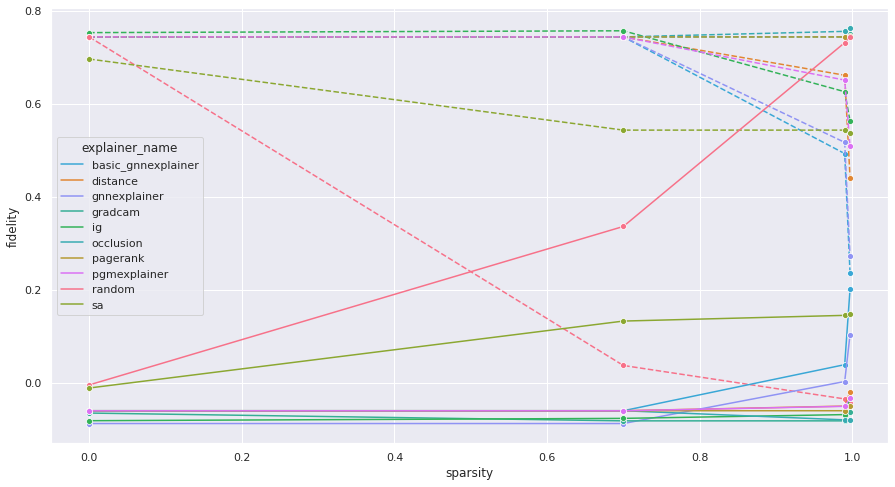

In [92]:
#### Fidelity Prob VS Sparsity ####

fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_hard[df_hard.dataset=="cora"],
    x="sparsity", y="fidelity_prob+",
    hue="explainer_name", palette=dict_color, marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_hard[df_hard.dataset=="cora"],
    x="sparsity", y="fidelity_prob-",
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)


plt.ylabel('fidelity')
plt.show()

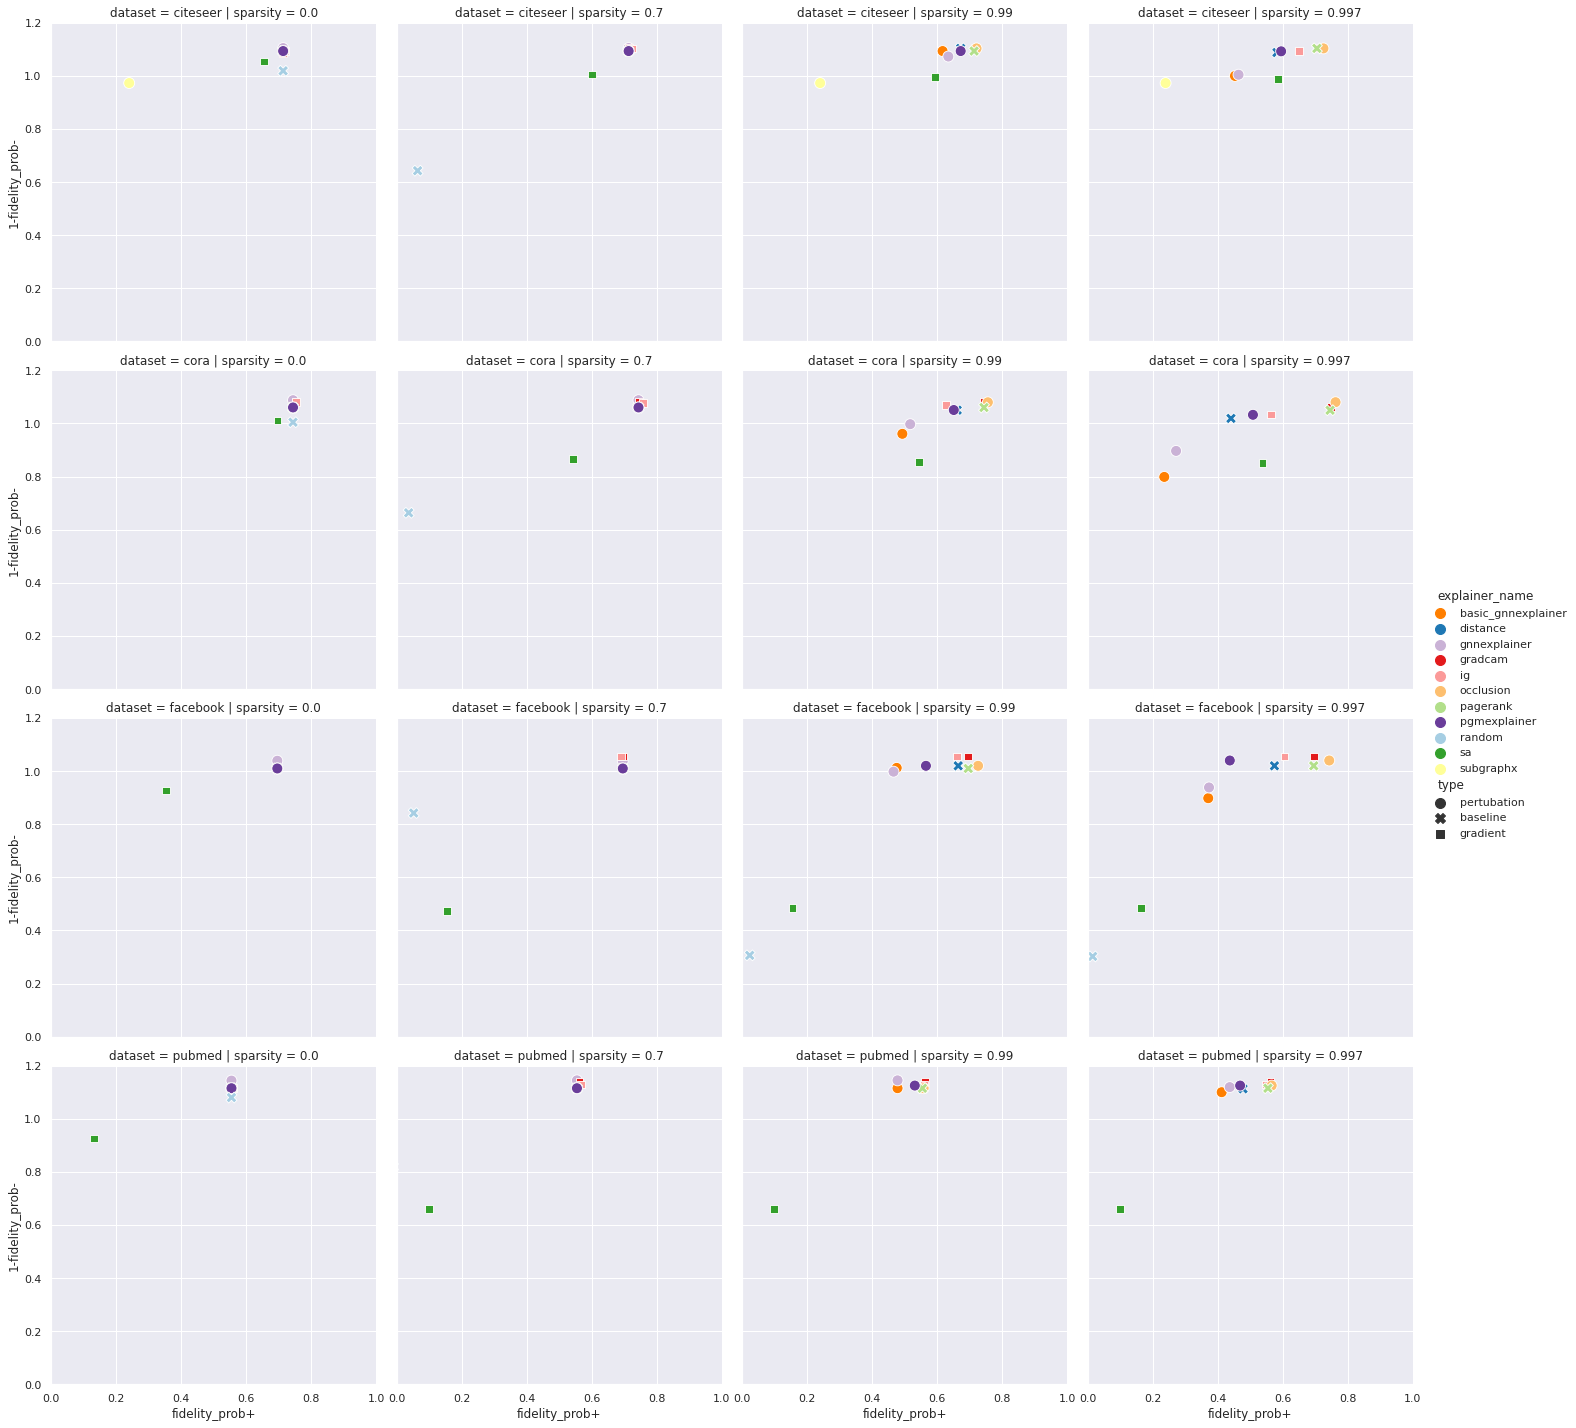

In [116]:
#### Fidelity Prob VS datasets & sparsity ####
g = sns.relplot(
        data=df_hard,
        x="fidelity_prob+", y="1-fidelity_prob-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=120, style="type", alpha = 1
    )
plt.xlim(0, 1)
plt.ylim(0, 1.2)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [100] 

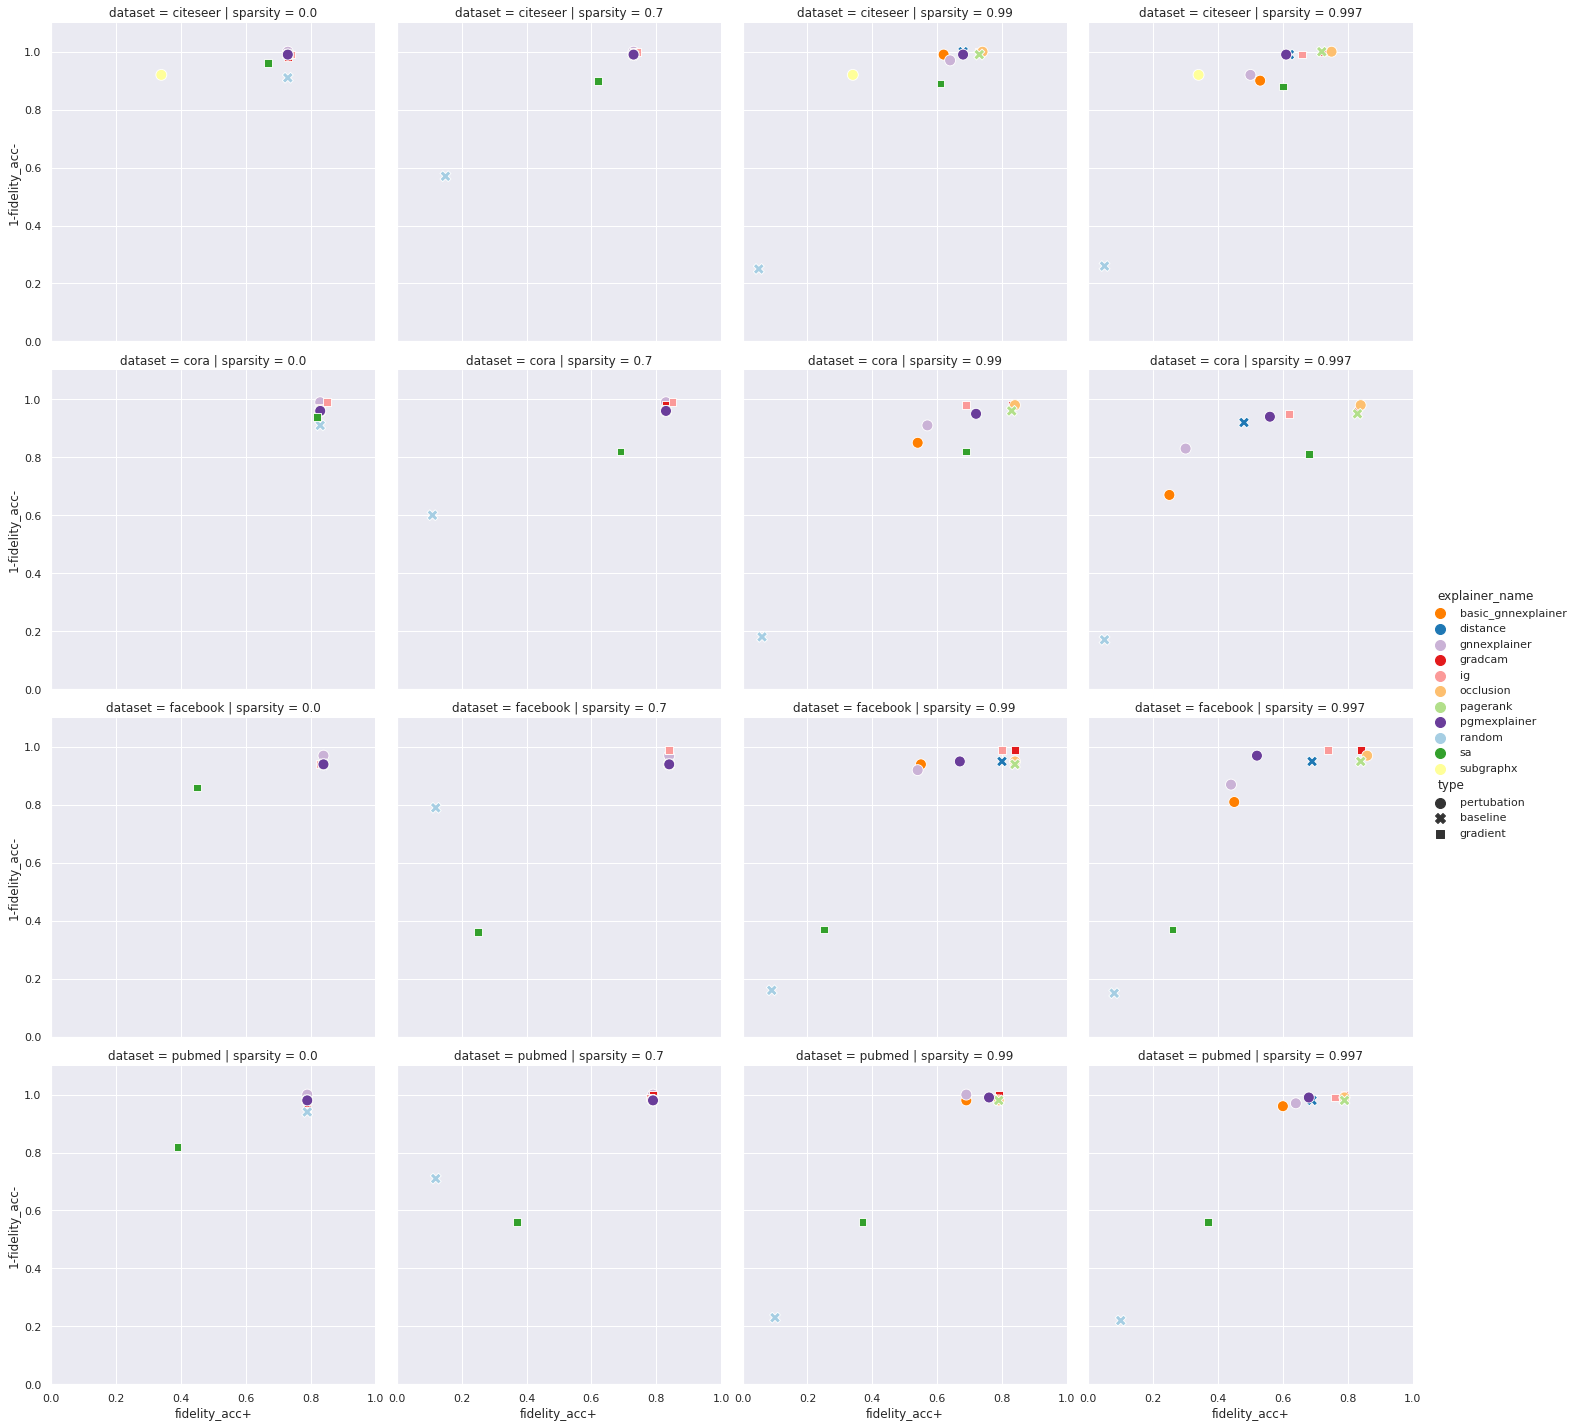

In [115]:
#### Fidelity Acc VS datasets & sparsity ####
sns.set()
g = sns.relplot(
        data=df_hard,
        x="fidelity_acc+", y="1-fidelity_acc-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=120, style="type", alpha = 1
    )

plt.xlim(0, 1)
plt.ylim(0, 1.1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [100] 


## Soft mask

In [117]:
df_soft = df[df.hard_mask==False]

In [118]:
df1 = df_soft.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean().reset_index()
df1s = df1[df1.sparsity==0.7]
res_init = df1s[['dataset', 'explainer_name', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact']]
res_init.groupby(by=['dataset', 'explainer_name']).mean()
#### Average characterization power among datasets for sparsity=0.7 ####
df_char = pd.pivot_table(res_init, values='charact', index=['explainer_name'], columns='dataset')
df_char['mean_charact'] = df_char.mean(axis=1)
df_char.sort_values(by=['mean_charact'])

dataset,citeseer,cora,facebook,pubmed,mean_charact
explainer_name,,,,,
random,0.365520,0.328481,0.353665,0.378876,0.356635
sa,0.663321,0.606103,0.210023,0.252055,0.432875
subgraphx,0.434344,NaN,NaN,NaN,0.434344
gnnexplainer,0.546432,0.483598,0.446687,0.520250,0.499242
basic_gnnexplainer,0.475912,0.513288,0.516365,0.494790,0.500089
gradcam,0.574843,0.561399,0.413846,0.527626,0.519428
distance,0.630717,0.613786,0.443403,0.506205,0.548528
pagerank,0.665896,0.646781,0.438301,0.561711,0.578172
ig,0.675105,0.632947,0.474115,0.561073,0.585810


In [119]:
#### Average characterization power for Cora according to sparsity ####
df1 = df_soft.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean().reset_index()
res_init = df1[['dataset', 'explainer_name', 'sparsity', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact']]
res_init.groupby(by=['dataset', 'explainer_name', 'sparsity']).mean()

df_char_cora = pd.pivot_table(res_init[res_init.dataset=="cora"], values='charact', index=['explainer_name'], columns='sparsity')
df_char_cora['mean_charact'] = df_char_cora.mean(axis=1)
df_char_cora.sort_values(by=['mean_charact'])

sparsity,0.0,0.7,0.99,0.997,mean_charact
explainer_name,,,,,
random,0.479227,0.328481,0.213083,0.209782,0.307643
gnnexplainer,0.479017,0.483598,0.454141,0.401577,0.454583
basic_gnnexplainer,0.538546,0.513288,0.456587,0.352957,0.465345
distance,0.613786,0.613786,0.547067,0.450511,0.556287
gradcam,0.561251,0.561399,0.558852,0.552230,0.558433
ig,0.634470,0.632947,0.591828,0.561128,0.605093
sa,0.651657,0.606103,0.602155,0.590164,0.612519
pagerank,0.646781,0.646781,0.639896,0.628426,0.640471
pgmexplainer,0.759345,0.759345,0.707276,0.627704,0.713417


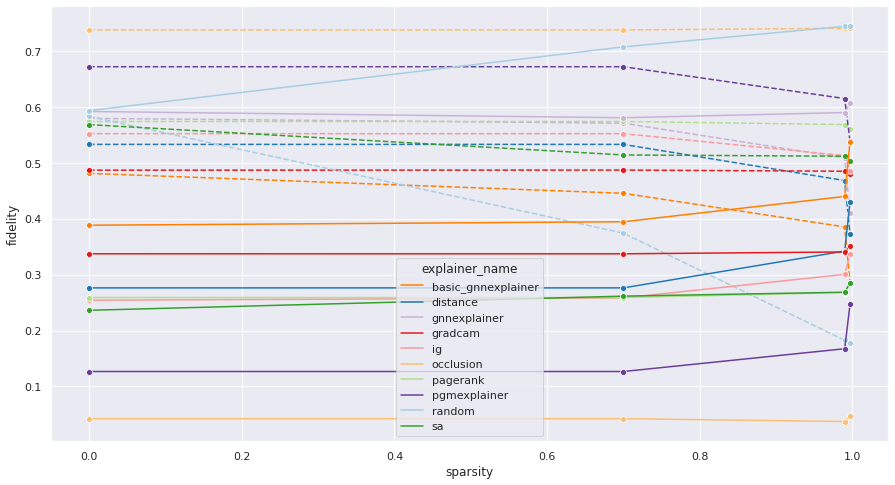

In [120]:
#### Fidelity Prob VS Sparsity ####

fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_soft[df_soft.dataset=="cora"],
    x="sparsity", y="fidelity_prob+",
    hue="explainer_name", palette=dict_color, marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_soft[df_soft.dataset=="cora"],
    x="sparsity", y="fidelity_prob-",
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)


plt.ylabel('fidelity')
plt.show()

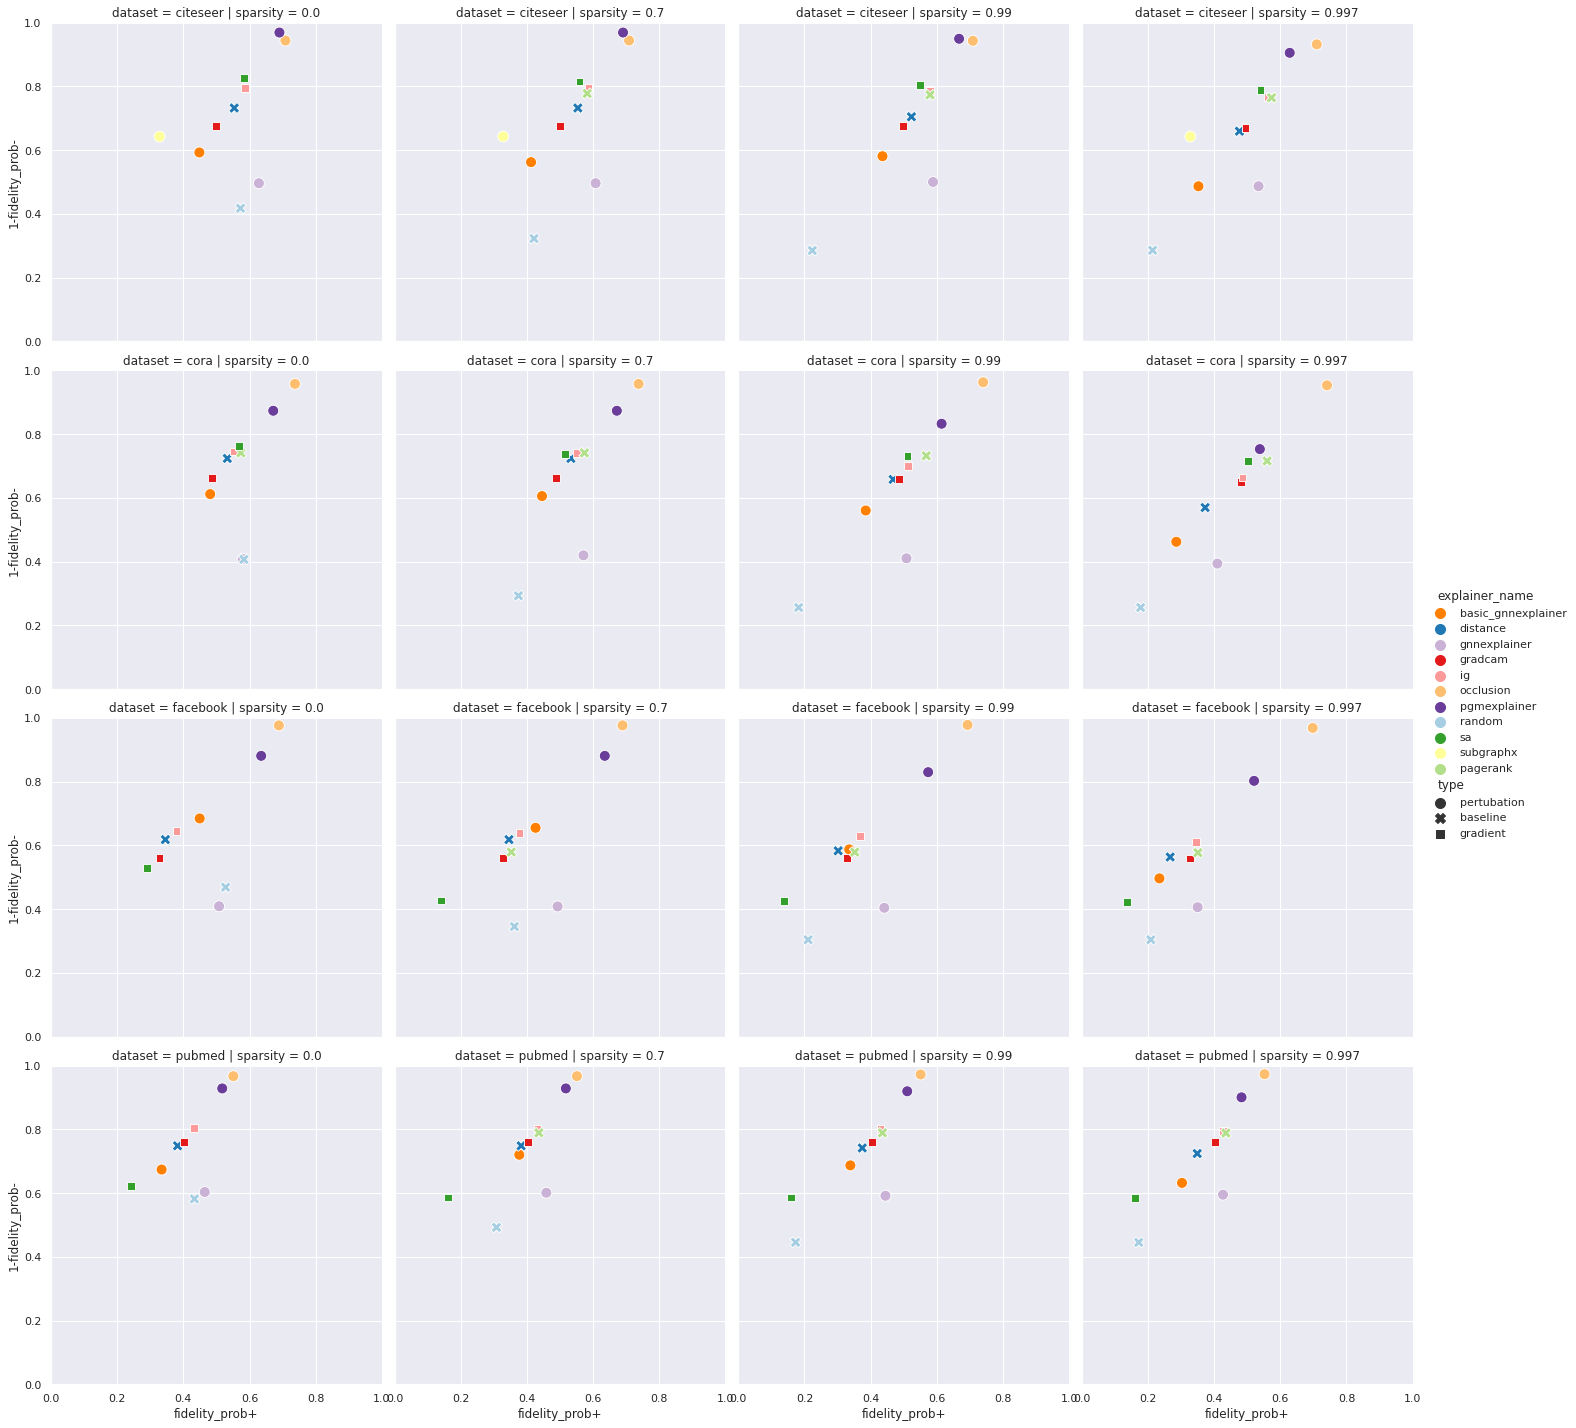

In [121]:
#### Fidelity Prob VS datasets & sparsity ####
sns.set()
g = sns.relplot(
        data=df_soft,
        x="fidelity_prob+", y="1-fidelity_prob-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=120, style="type", alpha = 1
    )
plt.xlim(0, 1)
plt.ylim(0, 1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [100] 

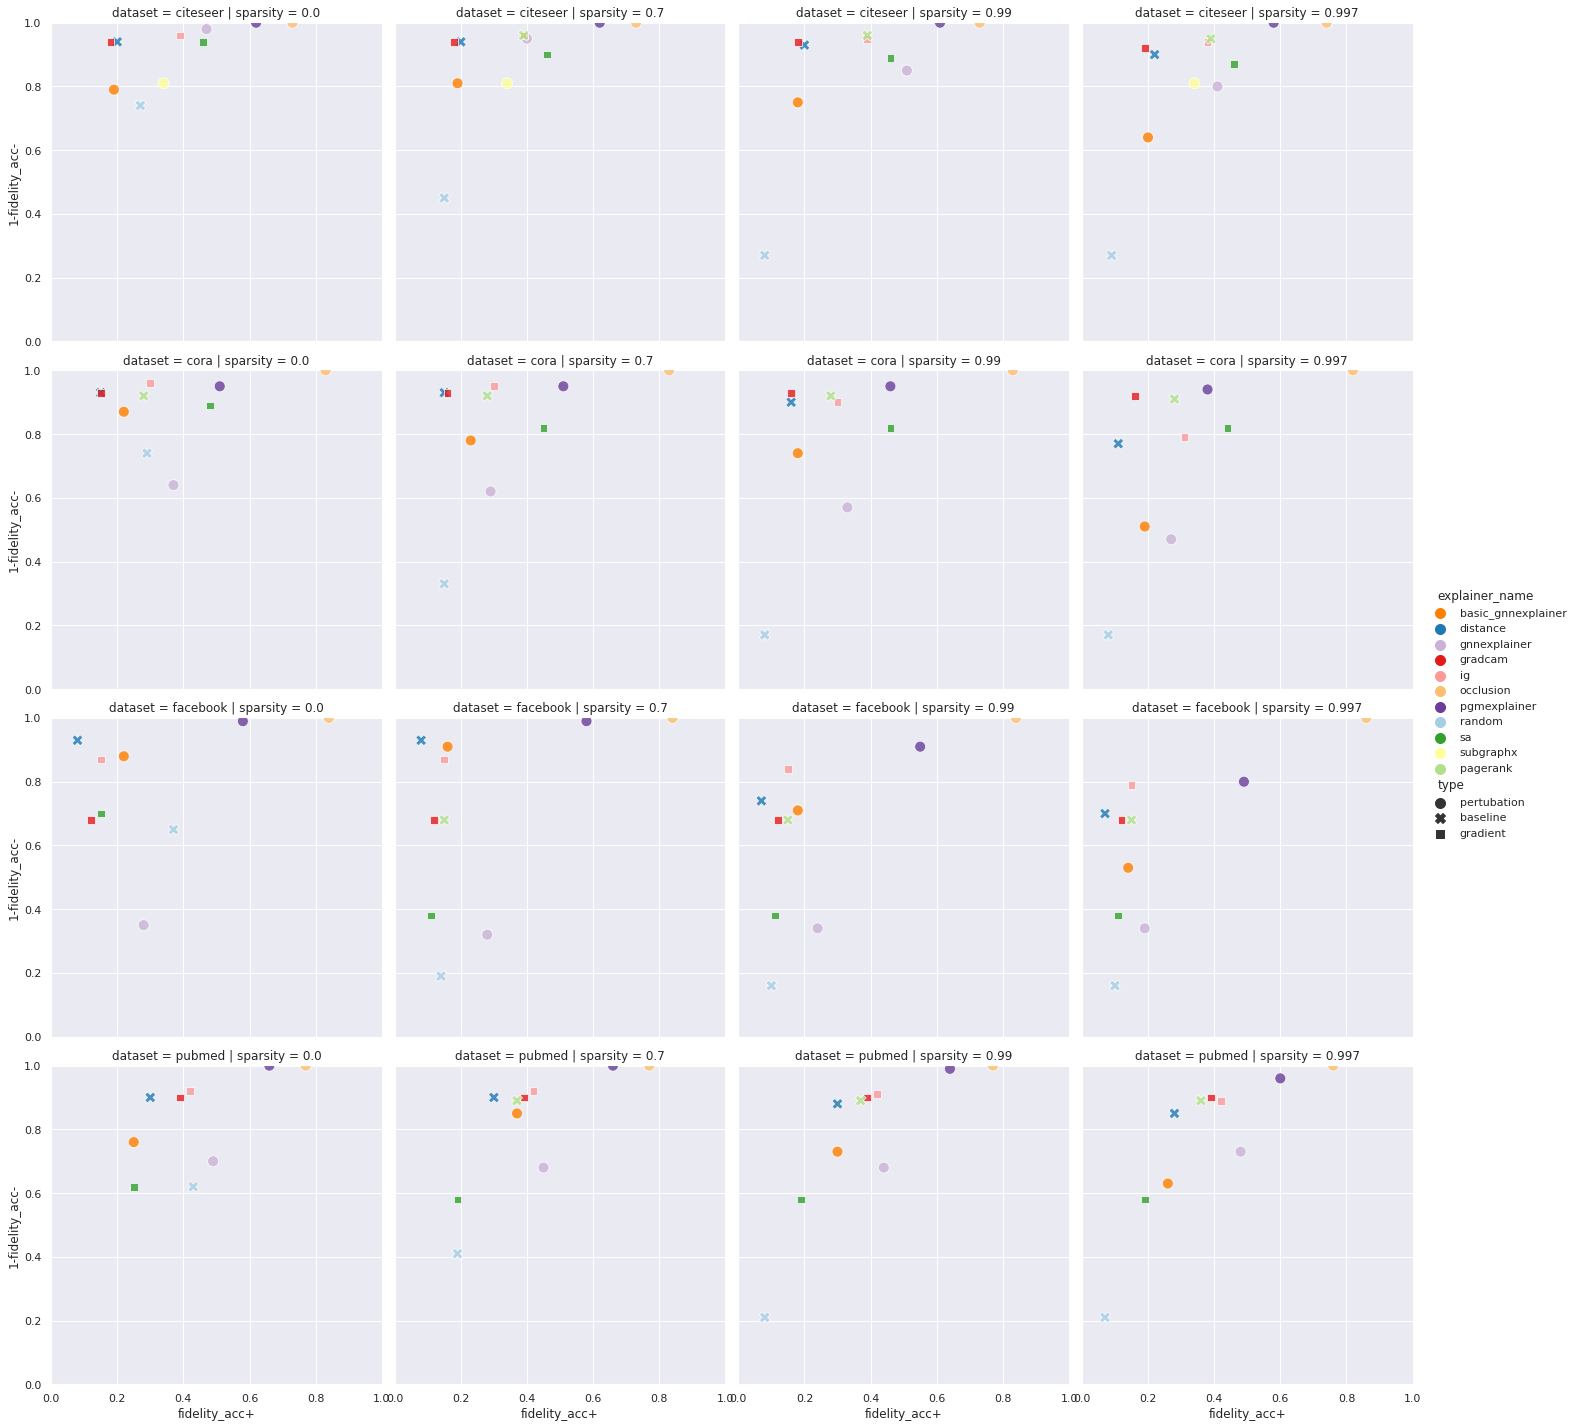

In [122]:
#### Fidelity Acc VS datasets & sparsity ####
sns.set()
g = sns.relplot(
        data=df_soft,
        x="fidelity_acc+", y="1-fidelity_acc-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=120, style="type", alpha = .8
    )

plt.xlim(0, 1)
plt.ylim(0, 1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [100] 

# Explain focus: GNN model

true_label_as_target = False

In [123]:
df_gnn = df_sparsity[df_sparsity['true_label_as_target']==False].reset_index()

In [124]:
df_gnn["1-fidelity_gnn_acc-"] = 1- df_gnn["fidelity_gnn_acc-"]
df_gnn["1-fidelity_gnn_prob-"] = 1- df_gnn["fidelity_gnn_prob-"]
df_gnn['charact'] = 2 * df_gnn['fidelity_gnn_prob+'] * (1-df_gnn['fidelity_gnn_prob-'])/ (df_gnn['fidelity_gnn_prob+']  + 1-df_gnn['fidelity_gnn_prob-'])


## Hard mask

In [125]:
df_gnn_hard = df_gnn[df_gnn.hard_mask==True]

In [126]:
df0 = df_gnn_hard.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean().reset_index()
df0s = df0[df0.sparsity==0.7]
res_init = df0s[['dataset', 'explainer_name', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact']]
res_init.groupby(by=['dataset', 'explainer_name']).mean()
#### Average characterization power among datasets for sparsity=0.7 ####
df_char = pd.pivot_table(res_init, values='charact', index=['explainer_name'], columns='dataset')
df_char['mean_charact'] = df_char.mean(axis=1)
df_char.sort_values(by=['mean_charact'])

dataset,citeseer,cora,facebook,pubmed,mean_charact
explainer_name,,,,,
random,0.303665,0.249333,0.231179,0.290686,0.268716
subgraphx,0.470423,NaN,NaN,NaN,0.470423
sa,0.613444,0.686005,0.461863,0.354164,0.528869
gnnexplainer,0.704928,0.777808,0.786982,0.619840,0.722390
pgmexplainer,0.722837,0.777038,0.783738,0.623854,0.726867
pagerank,0.722838,0.777038,0.783738,0.623854,0.726867
occlusion,0.722838,0.777038,0.783738,0.623854,0.726867
basic_gnnexplainer,0.722838,0.777038,0.783738,0.623854,0.726867
distance,0.722838,0.777038,0.783738,0.623854,0.726867


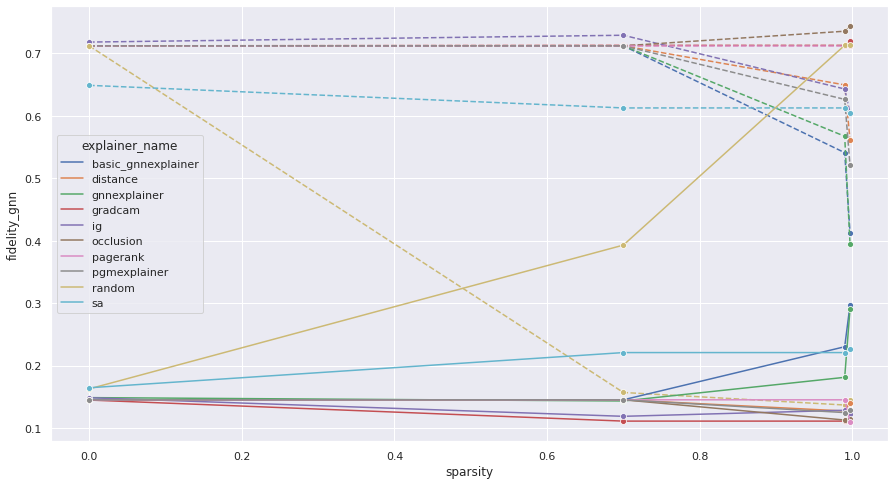

In [127]:
#### Fidelity Prob VS Sparsity ####

fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_gnn_hard[df_gnn_hard.dataset=="cora"],
    x="sparsity", y="fidelity_gnn_prob+",
    hue="explainer_name", marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_gnn_hard[df_gnn_hard.dataset=="cora"],
    x="sparsity", y="fidelity_gnn_prob-",
    hue="explainer_name", marker="o", ax=ax)


plt.ylabel('fidelity_gnn')
plt.show()

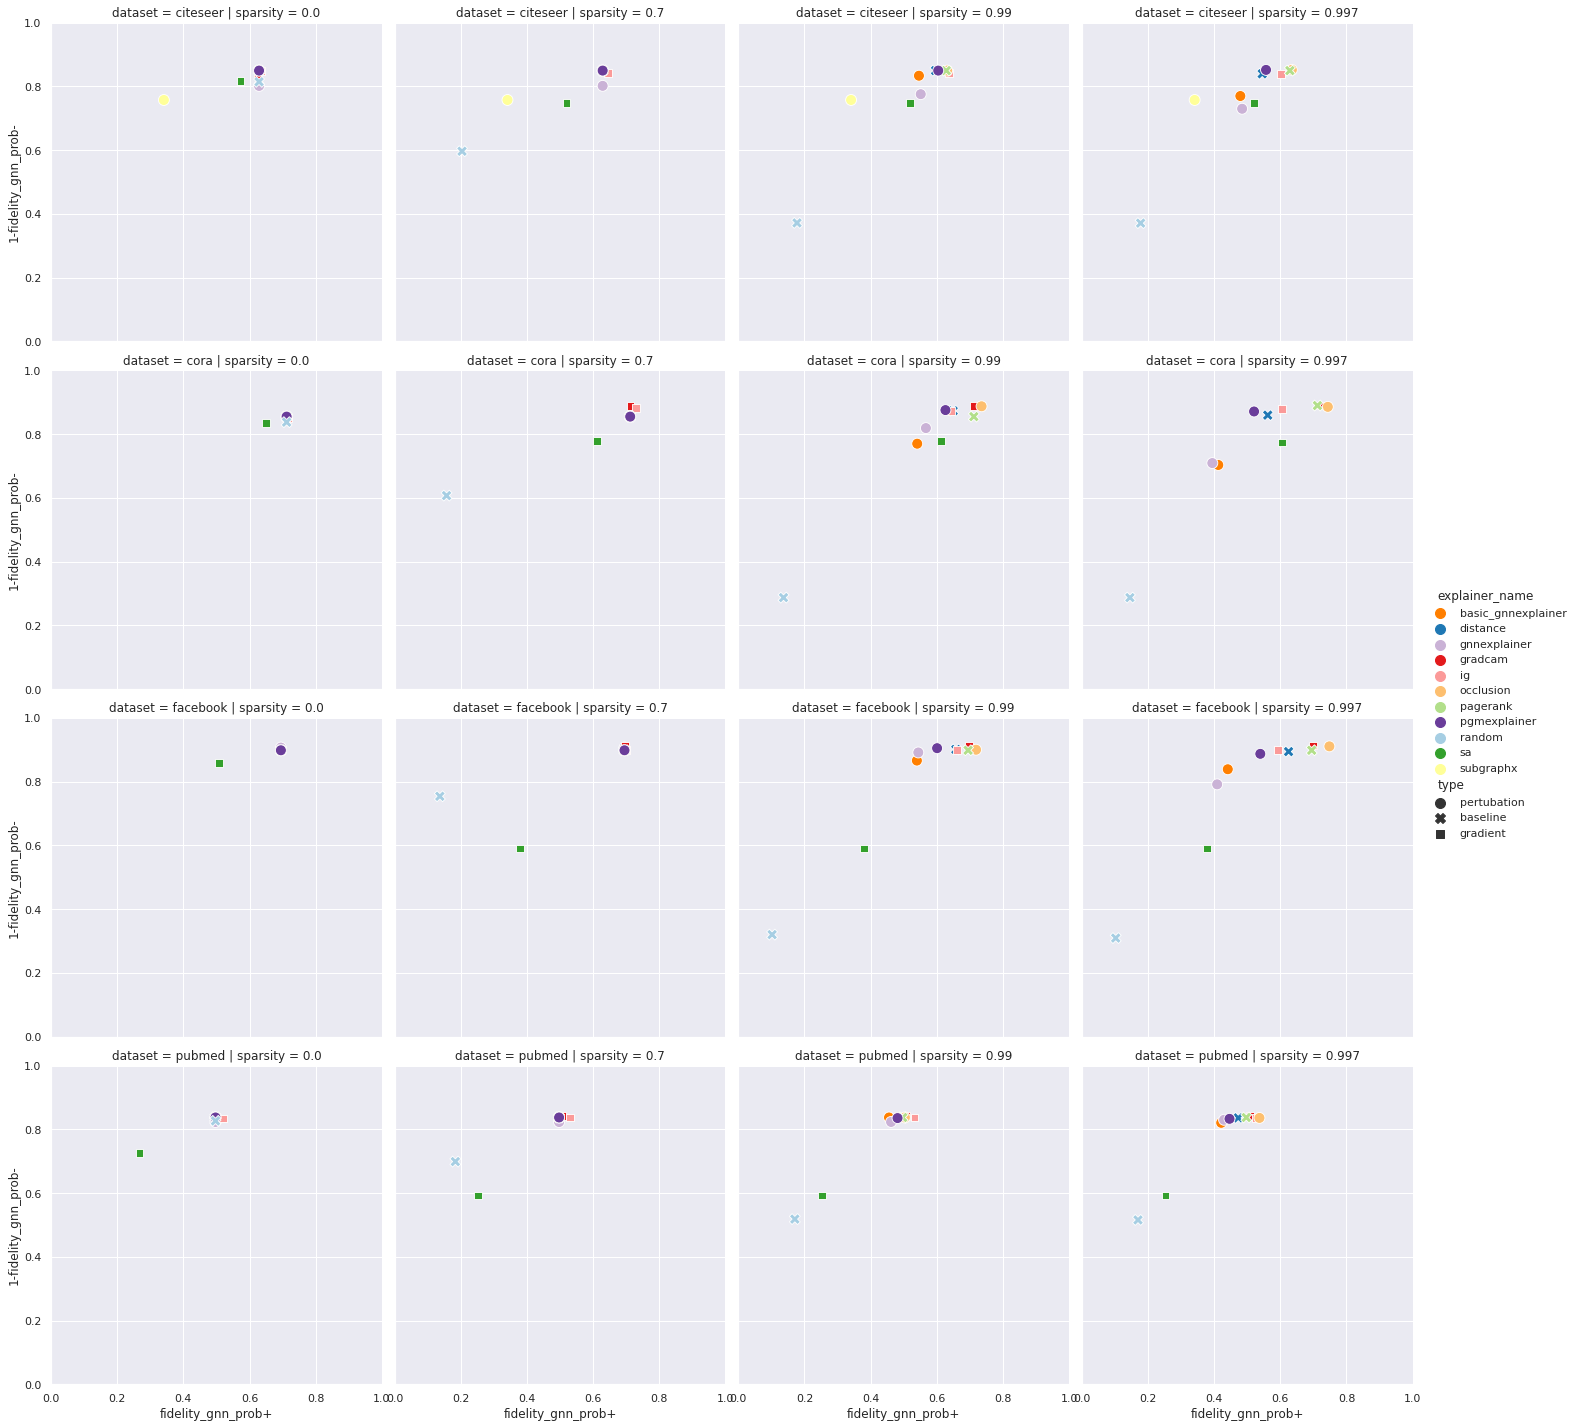

In [129]:
#### Fidelity Prob VS datasets & sparsity ####
g = sns.relplot(
        data=df_gnn_hard,
        x="fidelity_gnn_prob+", y="1-fidelity_gnn_prob-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=120, style="type", alpha = 1
    )

plt.xlim(0, 1)
plt.ylim(0, 1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [100] 

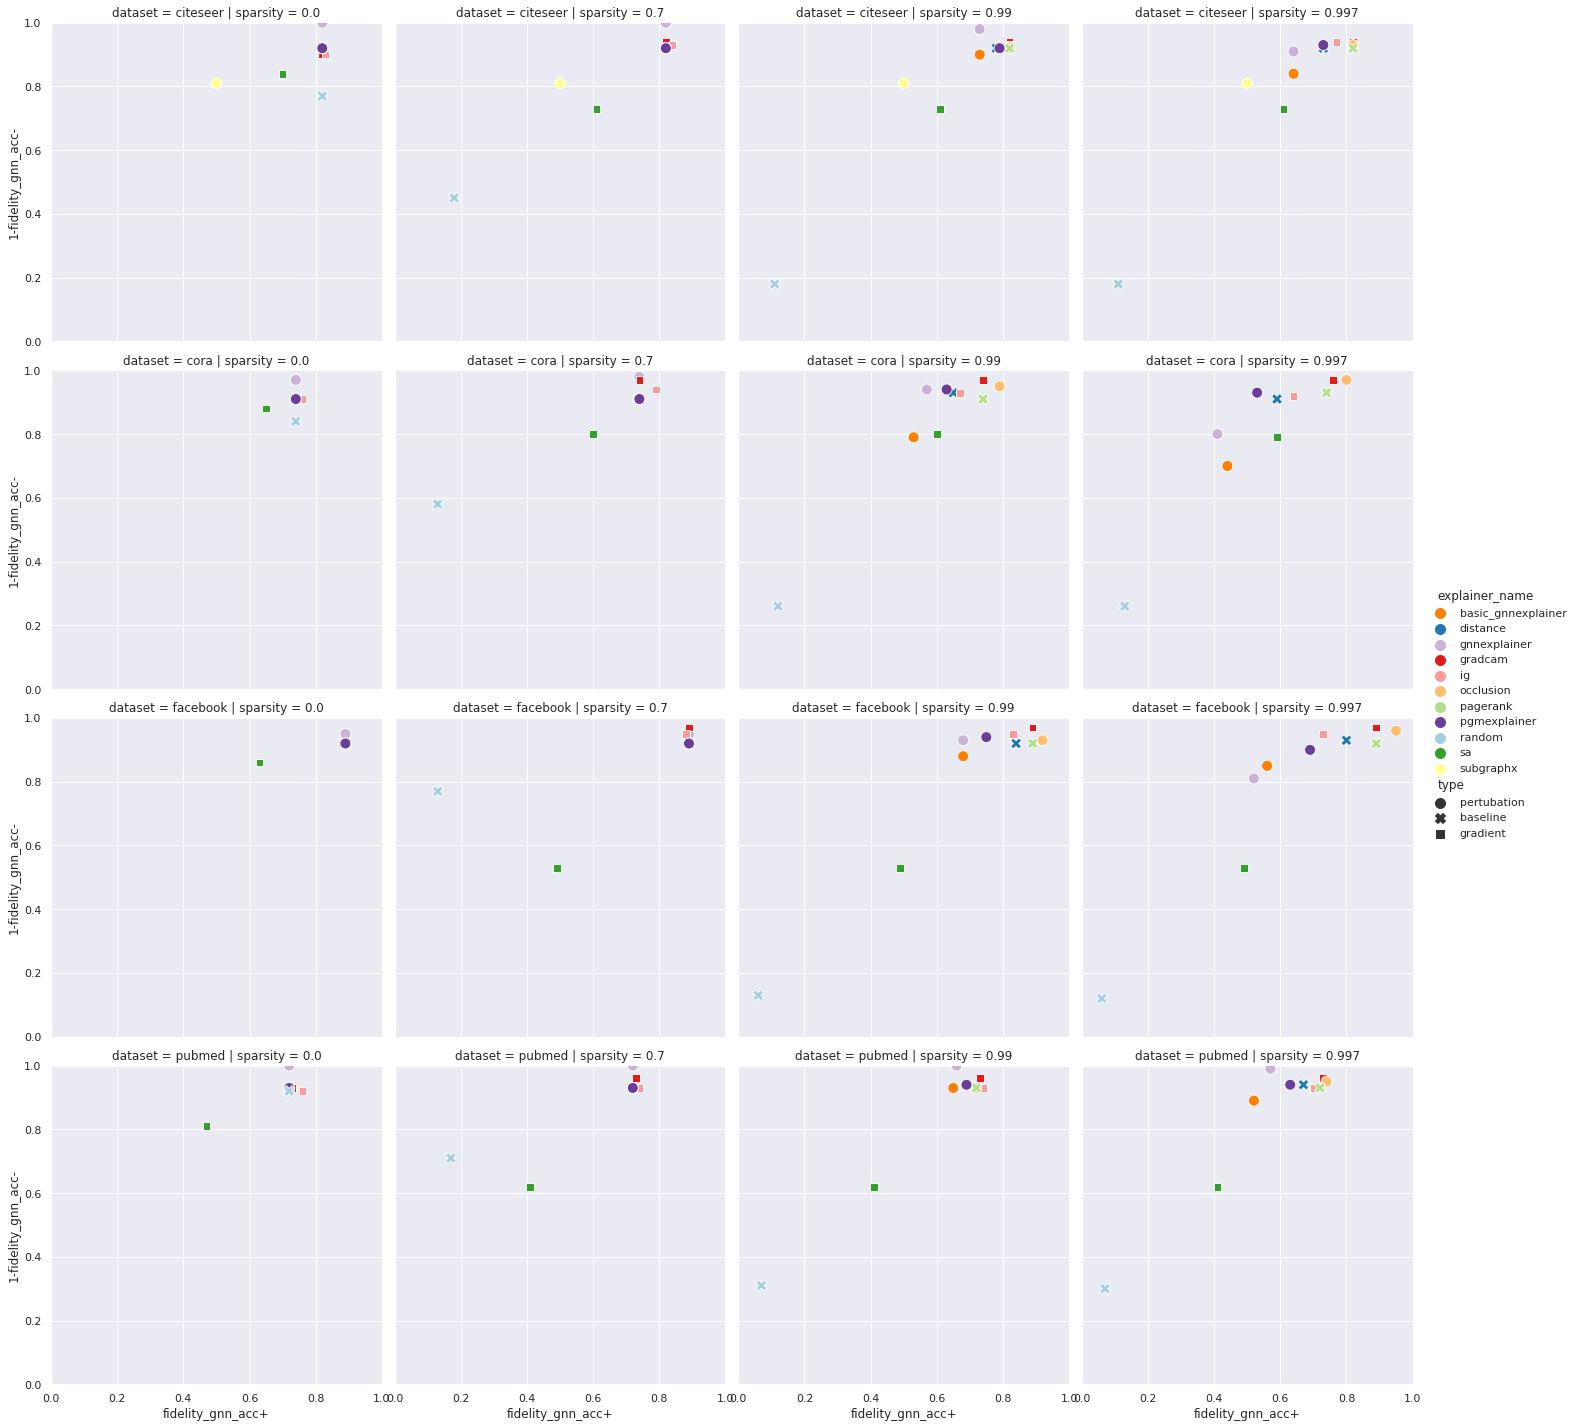

In [130]:
#### Fidelity Acc VS datasets & sparsity ####
sns.set()
g = sns.relplot(
        data=df_gnn_hard,
        x="fidelity_gnn_acc+", y="1-fidelity_gnn_acc-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=120, style="type", alpha =1
    )
plt.xlim(0, 1)
plt.ylim(0, 1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [100] 

## Soft mask

In [131]:
df_gnn_soft = df_gnn[df_gnn.hard_mask==False]

In [132]:
##### Characterization #####
df1 = df_gnn_soft.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean().reset_index()
df1s = df1[df1.sparsity==0.7]
res_init = df1s[['dataset', 'explainer_name', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact']]
res_init.groupby(by=['dataset', 'explainer_name']).mean()
#### Average characterization power among datasets for sparsity=0.7 ####
df_char = pd.pivot_table(res_init, values='charact', index=['explainer_name'], columns='dataset')
df_char['mean_charact'] = df_char.mean(axis=1)
df_char.sort_values(by=['mean_charact'])

dataset,citeseer,cora,facebook,pubmed,mean_charact
explainer_name,,,,,
random,0.380111,0.347887,0.340972,0.384398,0.363342
sa,0.565892,0.597408,0.361763,0.228832,0.438474
subgraphx,0.469739,NaN,NaN,NaN,0.469739
gnnexplainer,0.576488,0.490855,0.431931,0.503986,0.500815
basic_gnnexplainer,0.526015,0.535413,0.497004,0.447550,0.501495
gradcam,0.584661,0.558758,0.440750,0.486899,0.517767
distance,0.609529,0.602791,0.435326,0.472339,0.529996
pagerank,0.659461,0.636224,0.438805,0.512978,0.561867
ig,0.613262,0.637259,0.512740,0.518357,0.570405


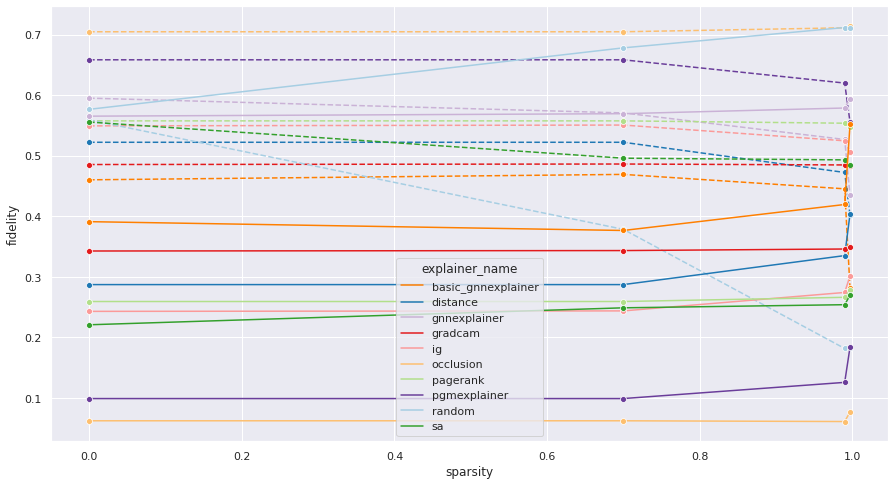

In [133]:
#### Fidelity Prob VS Sparsity ####

fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_gnn_soft[df_gnn_soft.dataset=="cora"],
    x="sparsity", y="fidelity_gnn_prob+",
    hue="explainer_name", palette=dict_color, marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_gnn_soft[df_gnn_soft.dataset=="cora"],
    x="sparsity", y="fidelity_gnn_prob-",
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)


plt.ylabel('fidelity')
plt.show()

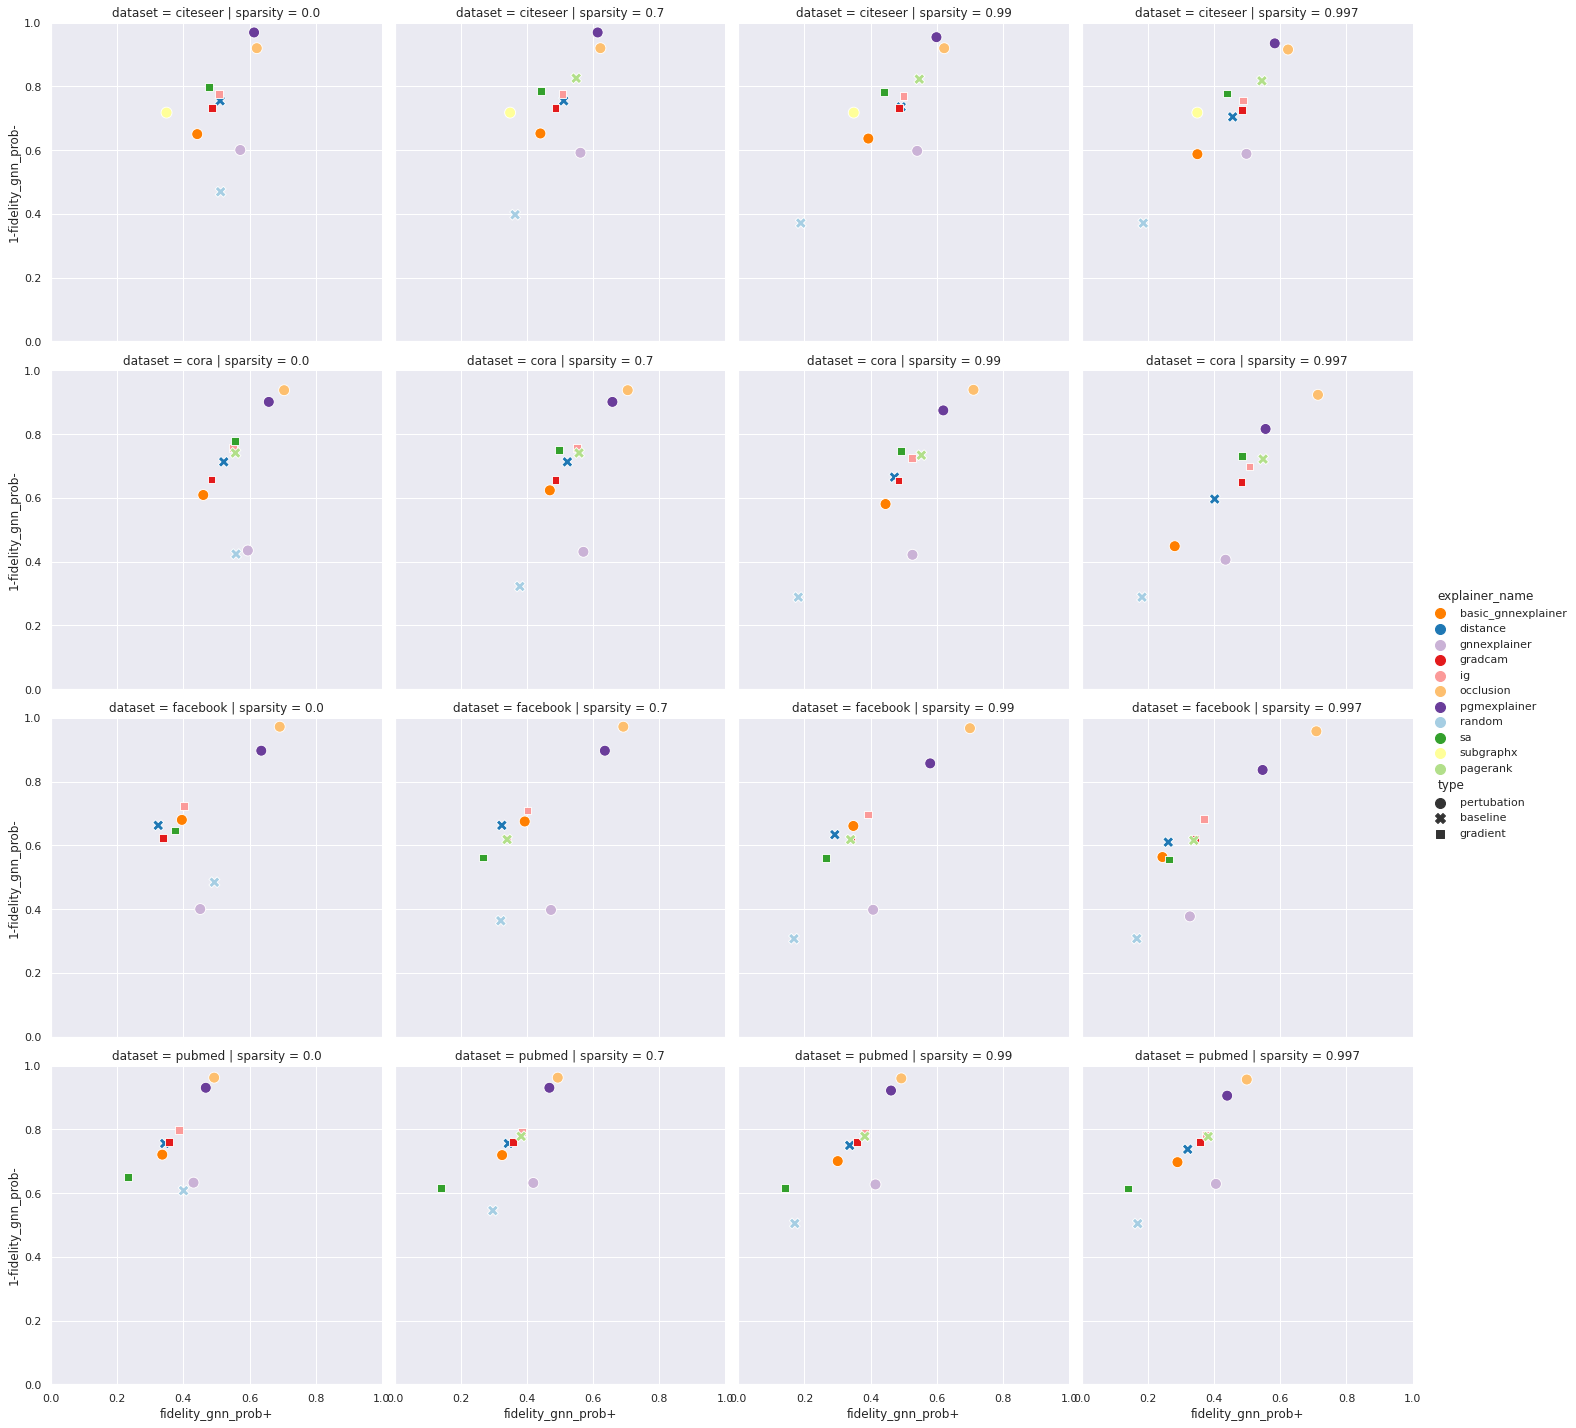

In [134]:
#### Fidelity Prob VS datasets & sparsity ####
sns.set()
g = sns.relplot(
        data=df_gnn_soft,
        x="fidelity_gnn_prob+", y="1-fidelity_gnn_prob-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=120, style="type", alpha =1
    )
plt.xlim(0, 1)
plt.ylim(0, 1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [100] 

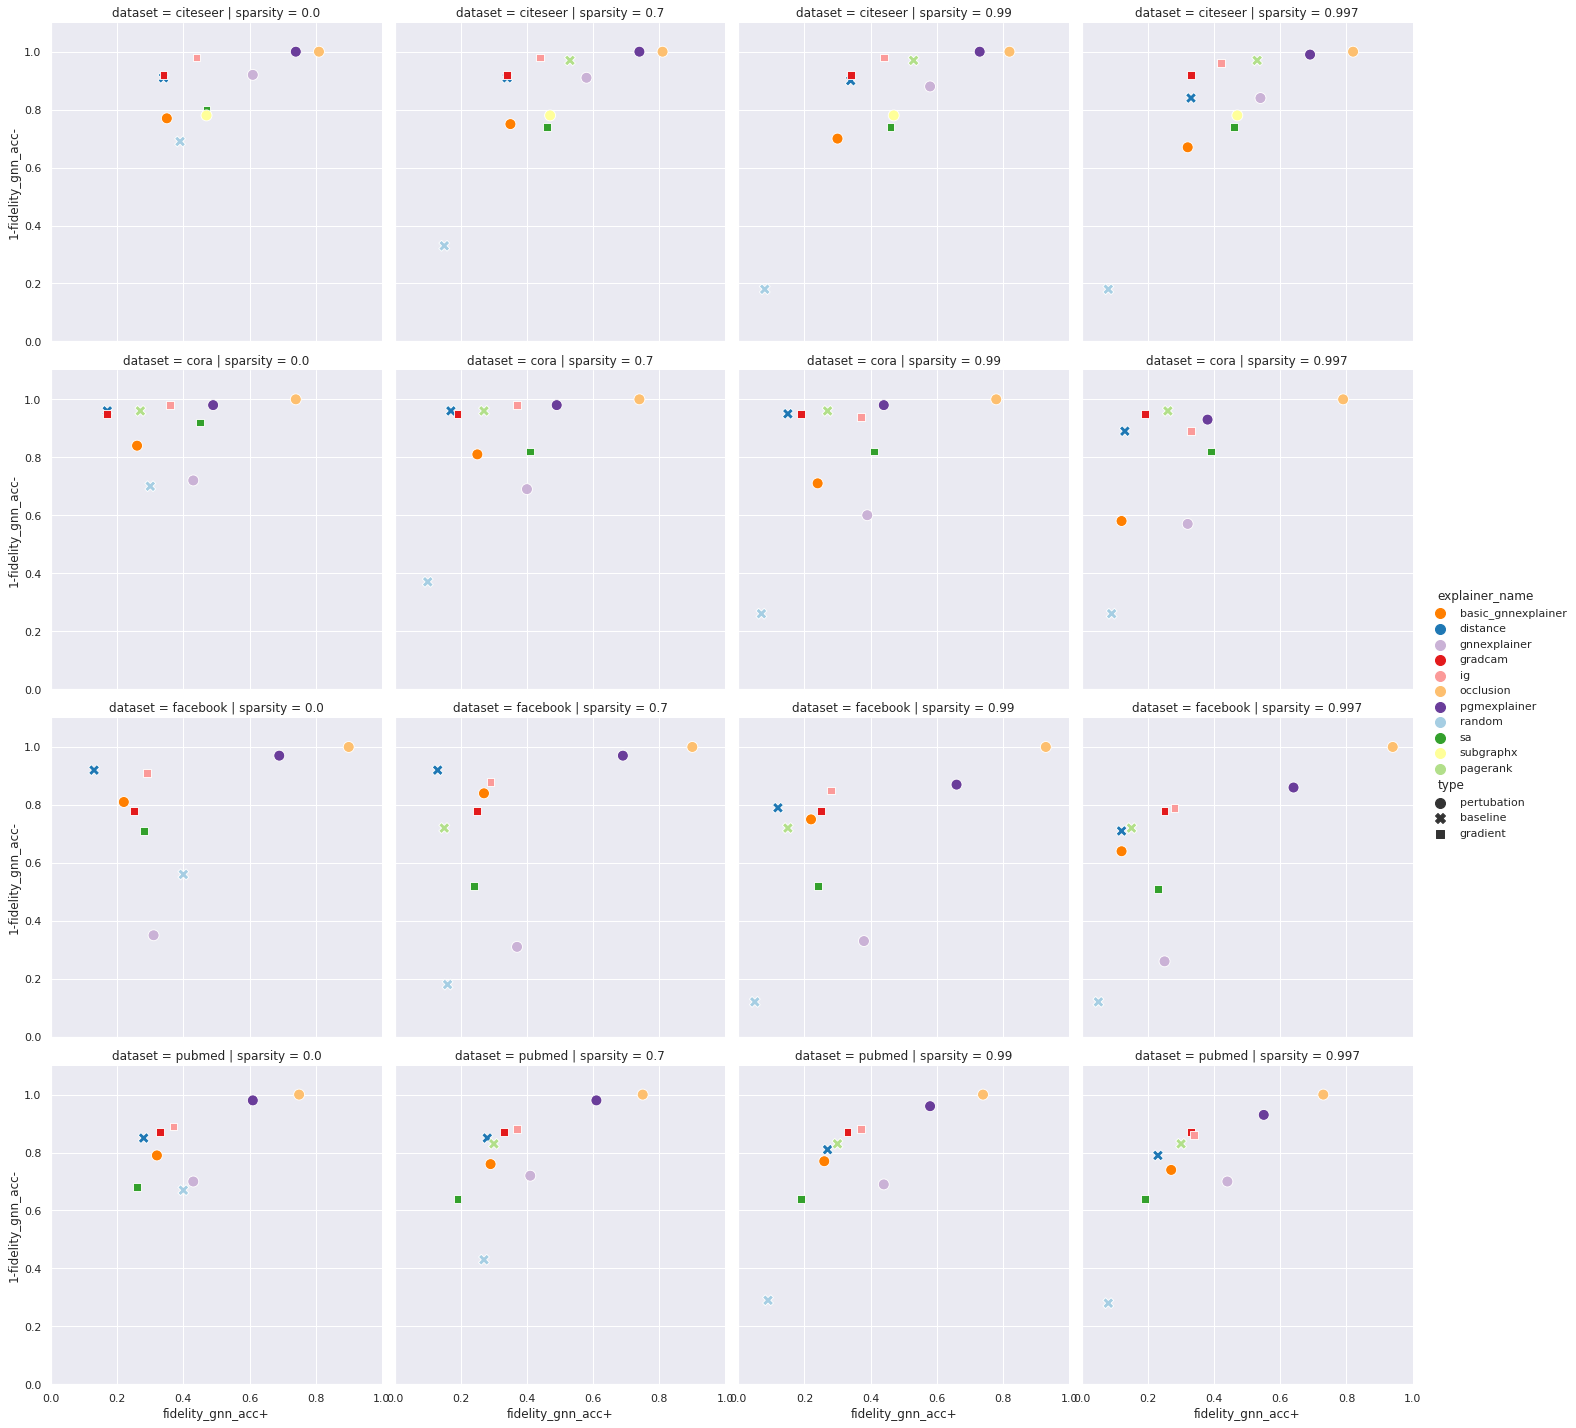

In [137]:
#### Fidelity Acc VS datasets & sparsity ####
sns.set()
g = sns.relplot(
        data=df_gnn_soft,
        x="fidelity_gnn_acc+", y="1-fidelity_gnn_acc-", col="sparsity", row="dataset", 
        hue="explainer_name", palette=dict_color, s=120, style="type", alpha =1
    )

plt.xlim(0, 1)
plt.ylim(0, 1.1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [100] 

# Characterization Summary

In [142]:
sparsity = 0.7
names = ["_hard", "_soft", "_gnn_hard", "_gnn_soft"]
dfs = []
for name in names:
    df = eval("df"+name).groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean().reset_index()
    df_small = df[df.sparsity==sparsity]
    res_init = df_small[['dataset', 'explainer_name', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact']]
    res_init.groupby(by=['dataset', 'explainer_name']).mean()
    #### Average characterization power among datasets for sparsity=0.7 ####
    df_char = pd.pivot_table(res_init, values='charact', index=['explainer_name'], columns='dataset')
    df_char['charact'] = df_char.mean(axis=1)
    df_char.sort_values(by=['charact'])

    c = df_char.rename_axis(None, axis=1).reset_index()
    c = c[["explainer_name", "charact"]]
    dfs.append(c)
    

    

In [143]:
for i in range(4):
    locals()["c"+names[i]] = dfs[i]

In [144]:
s_phen = pd.merge(dfs[0], dfs[1], on="explainer_name", how="outer", suffixes=["_phen_hard", "_phen_soft"])
s_gnn = pd.merge(dfs[2], dfs[3], on="explainer_name", how="outer", suffixes=["_gnn_hard", "_gnn_soft"])
summary = pd.merge(s_phen, s_gnn, on="explainer_name", how="outer")
summary

,explainer_name,charact_phen_hard,charact_phen_soft,charact_gnn_hard,charact_gnn_soft
0,basic_gnnexplainer,0.825835,0.500089,0.726867,0.501495
1,distance,0.825835,0.548528,0.726867,0.529996
2,gnnexplainer,0.833003,0.499242,0.722390,0.500815
3,gradcam,0.835485,0.519428,0.734932,0.517767
4,ig,0.838620,0.585810,0.741188,0.570405
5,occlusion,0.825835,0.788229,0.726867,0.751815
6,pagerank,0.825835,0.578172,0.726867,0.561867
7,pgmexplainer,0.825848,0.742161,0.726867,0.719794
8,random,0.066416,0.356635,0.268716,0.363342
9,sa,0.456807,0.432875,0.528869,0.438474


In [145]:
summary.to_csv('charact_summary_0.7.csv')